#### Support Vector Mechanism

    -   Supervised Learning Model
    -   We use it for classification
    -   Linearly seprabale data
    -   generlly used for binary classifications
    -   it also works on multiclass classification , it breaks the classes into small binary parts

#### One vs All Approach

    -   it has three classes - (+ , * , ^)
    -   Model 1 - ((+) , (*,^))
    -   Model 2 - ((*), (^,+))
    -   Model 3 - ((^) , (+,*))

#### One vs One Approach

    -   pair 1 (+,*)
    -   pair 2 (^,*)
    -   pair 3 (+,^)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df = df.replace({"species":{"setosa":1,"versicolor":2,"virginica":3}})

In [6]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3
149,5.9,3.0,5.1,1.8,3


Text(0.5, 1.0, 'co relation on iris dataset')

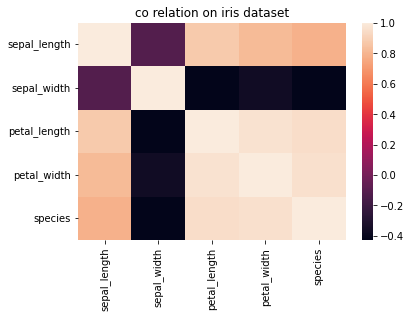

In [7]:
sns.heatmap(df.corr())
plt.title("co relation on iris dataset")

In [9]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1].values

In [10]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

In [14]:
from sklearn.svm import SVC
clf = SVC(random_state = 0)
clf.fit(xtrain,ytrain)

SVC(random_state=0)

In [15]:
ypred = clf.predict(xtest)

In [16]:
ypred

array([3, 1, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 1, 2, 2, 1, 1,
       3, 1, 1, 2, 3, 3, 2, 3], dtype=int64)

In [17]:
ytest

array([3, 1, 2, 1, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2, 1, 3, 3, 1, 2, 2, 1, 1,
       2, 1, 1, 2, 3, 3, 2, 3], dtype=int64)

In [18]:
from sklearn import metrics

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

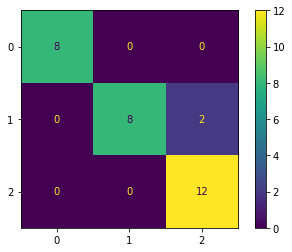

In [22]:
cm = metrics.confusion_matrix(ytest,ypred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm , display_labels = [False,True])
cm_display.plot()
plt.show()